In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import gzip
import tensorflow as tf
import glob
import math
import skimage
from matplotlib.patches import Rectangle
import json

In [2]:
tf.enable_eager_execution()

In [3]:
from softlearning.replay_pools.utils import get_replay_pool_from_variant

def get_grid_vals(env, n_samples):
    n_samples = 50
    obs_space = env.observation_space['state_observation']
    xs = np.linspace(obs_space.low[0], obs_space.high[0], n_samples)
    ys = np.linspace(obs_space.low[1], obs_space.high[1], n_samples)
    xys = np.meshgrid(xs, ys)
    return np.array(xys).transpose(1, 2, 0).reshape((n_samples * n_samples, 2)), xys

def get_replay_pool(checkpoint, checkpoint_dir):
    from softlearning.replay_pools.utils import get_replay_pool_from_variant

    variant = checkpoint['variant']
    train_env = checkpoint['training_environment']
    replay_pool = get_replay_pool_from_variant(variant, train_env)

    replay_pool_path = os.path.join(checkpoint_dir, 'replay_pool.pkl')
    replay_pool.load_experience(replay_pool_path)
    return replay_pool

def plot_trajectories(checkpoint, checkpoint_dir, num_trajectories=10):
    replay_pool = get_replay_pool(checkpoint, checkpoint_dir)
    trajectories = replay_pool.last_n_batch(100 * num_trajectories)['observations']['state_observation'] \
                    .reshape(num_trajectories, 100, -1)
    for i in range(num_trajectories):
        plt.plot(trajectories[i,:,0], trajectories[i,:,1], color='w', linewidth=1)

## Specify the Experiment Directory

In [4]:
common_dir = '/Users/kevintli/rail/data/ray_results'
universe = 'gym'
domain = 'Point2D'
task = 'Maze-v0'

In [6]:
checkpoint_to_analyze = 500

base_path = os.path.join(common_dir, universe, domain, task)
exps = sorted(list(glob.iglob(os.path.join(base_path, '*'))))
for i, exp in enumerate(exps):
    print(f'{i} \t {exp.replace(base_path, "")}')
    
exp_choice = int(input('\n Which experiment do you want to analyze? (ENTER A NUMBER) \t'))

exp_path = exps[exp_choice]
print('\n')
seeds = sorted(list(glob.iglob(os.path.join(exp_path, '*'))))
seeds = [seed for seed in seeds if os.path.isdir(seed)]
checkpoints = []
for i, seed in enumerate(seeds):
    print(f'{i} \t {seed.replace(exp_path, "")}')
    checkpoint_dir = os.path.join(seed, f'checkpoint_{checkpoint_to_analyze}')
    with open(os.path.join(seed, f'{checkpoint_dir}/checkpoint.pkl'), 'rb') as f:
        checkpoint = pickle.load(f)
        checkpoints.append([checkpoint, checkpoint_dir])

0 	 /2020-05-27T16-46-37-ddl_maze
1 	 /2020-05-27T18-08-07-ddl_maze_count
2 	 /2020-05-28T15-34-01-dynamics_aware_vice
3 	 /2020-05-31T05-25-18-vice_gt_embedding
4 	 /2020-06-02T01-19-37-test_logp_vice_gt_embedding
5 	 /2020-06-02T02-47-31-vice_gt_embedding_rerun
6 	 /2020-06-02T03-22-25-vice_gt_embedding_more_reg
7 	 /2020-06-02T10-48-03-vice_gt_embedding_again
8 	 /2020-06-03T00-23-13-high_reg_vice
9 	 /2020-06-03T06-19-35-vice_dropout_and_wd
10 	 /seed-7025
11 	 /videos-2320
12 	 /videos-7777
13 	 /videos2

 Which experiment do you want to analyze? (ENTER A NUMBER) 	9


W0603 17:58:53.769129 140736058082176 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.




0 	 /dea4faee-algorithm=VICE-seed=3351_2020-06-03_06-19-353061b3tw
1 	 /dea5a6d8-algorithm=VICE-seed=9850_2020-06-03_06-19-36wghlk4uo


W0603 17:58:53.955252 140736058082176 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0603 17:58:54.113655 140736058082176 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.


2 	 /dea627a2-algorithm=VICE-seed=2790_2020-06-03_06-19-36otchx9h1
3 	 /dea91c82-algorithm=VICE-seed=8031_2020-06-03_06-19-36fx668ydh


W0603 17:58:54.254428 140736058082176 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0603 17:58:54.419631 140736058082176 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.


4 	 /deabda80-algorithm=VICE-seed=483_2020-06-03_06-19-36yhcodgfc
5 	 /dead6742-algorithm=VICE-seed=2259_2020-06-03_06-19-37qg8wbhps


W0603 17:58:54.595465 140736058082176 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0603 17:58:54.719525 140736058082176 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.


6 	 /deade9a6-algorithm=VICE-seed=3554_2020-06-03_06-19-37o488jlx1
7 	 /deaef40e-algorithm=VICE-seed=3653_2020-06-03_06-19-37uchplyfo


W0603 17:58:54.888454 140736058082176 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.


8 	 /deb08120-algorithm=VICE-seed=5222_2020-06-03_06-19-37h3jq1prq


W0603 17:58:55.246766 140736058082176 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.


9 	 /deb20e14-algorithm=VICE-seed=7619_2020-06-03_06-19-3776lz9f2r


W0603 17:58:55.476108 140736058082176 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.


10 	 /deb29726-algorithm=VICE-seed=1109_2020-06-03_06-19-37ikj4dxvw


W0603 17:58:55.753782 140736058082176 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0603 17:58:55.931190 140736058082176 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.


11 	 /deb39c66-algorithm=VICE-seed=7474_2020-06-03_06-19-379jmps1r4
12 	 /deb526d0-algorithm=VICE-seed=2765_2020-06-03_06-19-37mkdg0l64


W0603 17:58:56.098702 140736058082176 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.


13 	 /deb6b37e-algorithm=VICE-seed=2759_2020-06-03_06-19-37pv12h_26


W0603 17:58:56.311507 140736058082176 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0603 17:58:56.505542 140736058082176 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.


14 	 /deb737d6-algorithm=VICE-seed=3290_2020-06-03_06-19-379fcn05os
15 	 /deb8b688-algorithm=VICE-seed=4278_2020-06-03_06-19-37p_5aukff


W0603 17:58:56.671369 140736058082176 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0603 17:58:56.862716 140736058082176 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.


16 	 /deba8364-algorithm=VICE-seed=8791_2020-06-03_06-19-37w1u0p5l6
17 	 /debb0afa-algorithm=VICE-seed=8980_2020-06-03_06-19-37aw39c_ek


W0603 17:58:57.039104 140736058082176 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.


## View all seeds at once

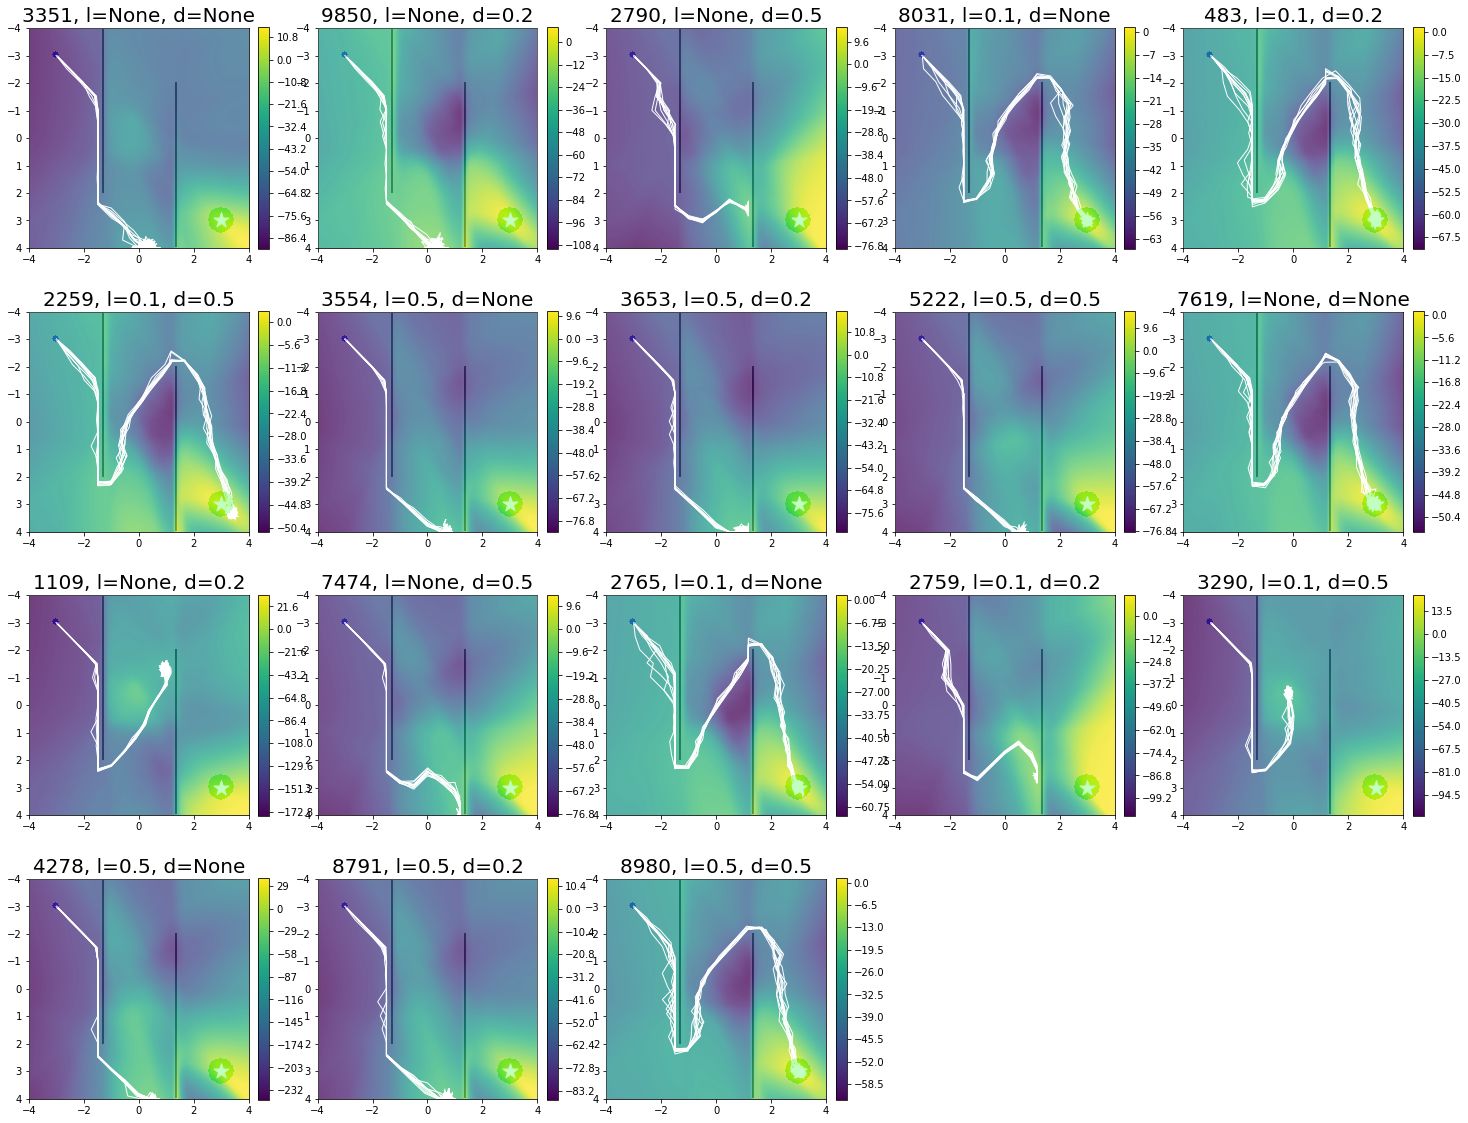

In [9]:
n_plots = len(checkpoints)
n_columns = int(np.sqrt(n_plots) + 1)
n_rows = np.ceil(n_plots / n_columns)
plt.figure(figsize=(5 * n_columns, 5 * n_rows))

for i, (checkpoint, checkpoint_dir) in enumerate(checkpoints):
    reward_clf = checkpoint['reward_classifier']
    train_env = checkpoint['training_environment']
    target_pos = train_env.unwrapped._get_obs()['state_desired_goal']
    
    n_bins = train_env.n_bins + 1

    for j in range(n_bins):
        for k in range(n_bins):
            obs = np.eye(n_bins)[np.array([j, k])].flatten()
            
    n_samples = 50
    grid_vals, xys = get_grid_vals(train_env, n_samples)
    
    rewards = reward_clf.predict(grid_vals)
    
    plt.subplot(n_rows, n_columns, i+1, aspect=1)
    plt.imshow(train_env.render('rgb_array', width=256, height=256),
           extent=(-4, 4, -4, 4), origin='lower', alpha=0.25, zorder=3)
    
    plt.gca().invert_yaxis()
    plt.contourf(xys[0], xys[1], rewards.reshape(xys[0].shape), levels=300)
    plt.colorbar(fraction=0.046, pad=0.04)
    target_pos = train_env.unwrapped._get_obs()['state_desired_goal']
    plt.scatter(*target_pos, marker='*', s=250, color='white')
    
    plot_trajectories(checkpoint, checkpoint_dir)
    with open(os.path.join("/".join(checkpoint_dir.split("/")[:-1]), "params.pkl"), 'rb') as f:
        try:
            params = pickle.load(f)
        except:
            with open(os.path.join("/".join(checkpoint_dir.split("/")[:-1]), "params.json"), 'rb') as f:
                params = json.load(f)
        reg = params['reward_classifier_params']['kwargs']['kernel_regularizer_lambda']
        dropout = params['reward_classifier_params']['kwargs']['dropout']
    plt.title(f'{checkpoint_dir.split("/")[-2].split("=")[-1].split("_")[0]}, l={reg}, d={dropout}', fontsize=20)
    

## Analyze a single seed in detail

In [29]:
base_path = os.path.join(common_dir, universe, domain, task)
exps = sorted(list(glob.iglob(os.path.join(base_path, '*'))))
for i, exp in enumerate(exps):
    print(f'{i} \t {exp.replace(base_path, "")}')
    
exp_choice = int(input('\n Which experiment do you want to analyze? (ENTER A NUMBER) \t'))

exp_path = exps[exp_choice]
print('\n')
seeds = sorted(list(glob.iglob(os.path.join(exp_path, '*'))))
seeds = [seed for seed in seeds if os.path.isdir(seed)]
for i, seed in enumerate(seeds):
    print(f'{i} \t {seed.replace(exp_path, "")}')
    
# TODO: Extend to analyzing all seeds
seed_choice = int(input('\n Which seed do you want to analyze? (ENTER A NUMBER) \t'))

seed_path = seeds[seed_choice]

print('PATH:\n', seed_path)

0 	 /2020-05-27T16-46-37-ddl_maze
1 	 /2020-05-27T18-08-07-ddl_maze_count
2 	 /2020-05-28T15-34-01-dynamics_aware_vice
3 	 /2020-05-31T05-25-18-vice_gt_embedding
4 	 /2020-06-02T01-19-37-test_logp_vice_gt_embedding
5 	 /2020-06-02T02-47-31-vice_gt_embedding_rerun
6 	 /2020-06-02T03-22-25-vice_gt_embedding_more_reg
7 	 /2020-06-02T10-48-03-vice_gt_embedding_again
8 	 /2020-06-03T00-23-13-high_reg_vice
9 	 /seed-7025
10 	 /videos-2320
11 	 /videos-7777
12 	 /videos2

 Which experiment do you want to analyze? (ENTER A NUMBER) 	7


0 	 /359cd456-algorithm=VICE-seed=9851_2020-06-02_10-48-04io4w_v2u
1 	 /359d7f64-algorithm=VICE-seed=9121_2020-06-02_10-48-04zh632fzt
2 	 /359f94b6-algorithm=VICE-seed=6732_2020-06-02_10-48-05zp7bp8hs
3 	 /35a02098-algorithm=VICE-seed=553_2020-06-02_10-48-05hb8dkysm
4 	 /35a0d59c-algorithm=VICE-seed=1512_2020-06-02_10-48-05lpd3p9rq
5 	 /35a1fcd8-algorithm=VICE-seed=3543_2020-06-02_10-48-05pl4su2db
6 	 /35a285c2-algorithm=VICE-seed=2537_2020-06-02_14-42-41qqcvrx1

In [30]:
import json

# Print hyperparameters

with open(os.path.join(seed_path, 'params.json'), 'rb') as f:
    params = json.load(f)

# print(json.dumps(params, indent=4))
hyperparams = {
    'use_count_reward': params['environment_params']['training']['kwargs']['use_count_reward'],
#     'positive_on_first_occurrence': params['algorithm_params']['kwargs']['positive_on_first_occurence'],
#     'discount_factor': params['algorithm_params']['kwargs']['normalize_ext_reward_gamma'],
    'weight_decay': params['reward_classifier_params']['kwargs']['kernel_regularizer_lambda'],
}
for name, value in hyperparams.items():
    print(f"{name}: {value}")

use_count_reward: True
weight_decay: 0.001


## Specify the Checkpoint

In [31]:
checkpoint_to_analyze = 500
checkpoint_dir = os.path.join(seed_path, f'checkpoint_{checkpoint_to_analyze}')

In [32]:
with open(os.path.join(seed_path, f'{checkpoint_dir}/checkpoint.pkl'), 'rb') as f:
    checkpoint = pickle.load(f)

W0603 02:49:56.613759 140736058082176 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.


## Load Reward Classifier

In [33]:
print(checkpoint.keys())

dict_keys(['variant', 'training_environment', 'evaluation_environment', 'algorithm', 'policy_weights', 'rnd_networks', 'reward_classifier'])


In [34]:
reward_clf = checkpoint['reward_classifier']

In [35]:
train_env = checkpoint['training_environment']

In [36]:
target_pos = train_env.unwrapped._get_obs()['state_desired_goal']

In [37]:
n_bins = train_env.n_bins + 1

for i in range(n_bins):
    for j in range(n_bins):
        obs = np.eye(n_bins)[np.array([i, j])].flatten()

In [38]:
n_samples = 50
obs_space = train_env.unwrapped.observation_space['state_observation']
xs = np.linspace(obs_space.low[0], obs_space.high[0], n_samples)
ys = np.linspace(obs_space.low[1], obs_space.high[1], n_samples)

xys = np.meshgrid(xs, ys)

In [39]:
grid_vals = np.array(xys).transpose(1, 2, 0).reshape((n_samples * n_samples, 2))
# grid_vals = np.array([np.eye(n_bins)[train_env.unwrapped._discretize_observation(grid_val)].flatten() for grid_val in grid_vals])

In [40]:
grid_vals.shape

(2500, 2)

In [41]:
rewards = reward_clf.predict(grid_vals)

In [54]:
reward_clf.summary()

Model: "picklable_model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
state_observation (InputLaye [(None, 2)]               0         
_________________________________________________________________
embedding_fn (PicklableModel (None, 16)                70672     
_________________________________________________________________
feedforward_reward_classifie (None, 1)                 70401     
Total params: 141,073
Trainable params: 70,401
Non-trainable params: 70,672
_________________________________________________________________


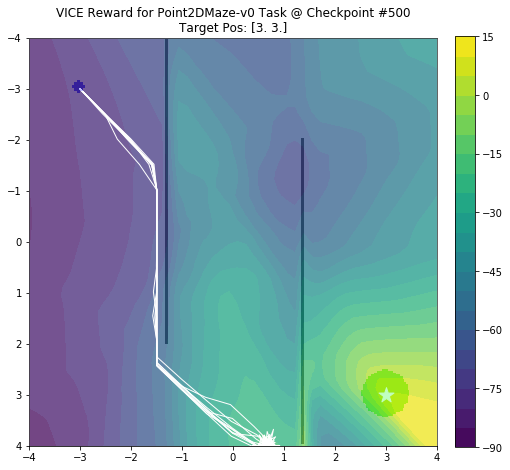

In [43]:
plt.figure(figsize=(8, 8))
from matplotlib.patches import Rectangle

plt.imshow(train_env.render('rgb_array', width=256, height=256),
           extent=(-4, 4, -4, 4), origin='lower', alpha=0.25, zorder=3)

plt.gca().invert_yaxis()
plt.contourf(xys[0], xys[1], rewards.reshape(xys[0].shape), levels=20)
plt.colorbar(fraction=0.046, pad=0.04)
plot_trajectories(checkpoint, checkpoint_dir)

# print(type(train_env._env.unwrapped))
# print(dir(train_env._env.unwrapped))
# print(train_env._medium_maze_manhattan_distance(xys))

if task == 'BoxWall-v1':
    currentAxis = plt.gca()
    currentAxis.add_patch(Rectangle((-2, -2), 4, 4,
                          alpha=1, fill=None, linewidth=4))

plt.scatter(*target_pos, marker='*', s=250, color='white')
plt.title(f'VICE Reward for {domain + task} Task @ Checkpoint #{checkpoint_to_analyze}\n'
          + f'Target Pos: {target_pos}')
plt.show()

In [12]:
def _maze_distance(self, obs):
    achieved_goals = obs['state_achieved_goal']
    desired_goals = obs['state_desired_goal']

    d = np.zeros(len(achieved_goals))
    left_wall_x = -self.boundary_dist/3
    left_wall_bottom = self.inner_wall_max_dist
    right_wall_x = self.boundary_dist/3
    right_wall_top = -self.inner_wall_max_dist
    
    positions = achieved_goals.copy()
    xs = positions[:,0]
    ys = positions[:,1]
    
    # Left section
    d += (xs < left_wall_x) * np.clip(left_wall_bottom - ys, 0, None)
    ys[xs < left_wall_x] = left_wall_bottom
    
    # Middle section
    d += (xs < right_wall_x) * np.clip(ys - right_wall_top, 0, None)
    ys[xs < right_wall_x] = right_wall_top
    
    # Right section
    d += np.abs(ys - desired_goals[:,1])
    
    # Horizontal movement
    d += np.abs(xs - desired_goals[:,0])
    
    return d

def _direct_distance(self, obs):
    achieved_goals = obs['state_achieved_goal']
    desired_goals = obs['state_desired_goal']

    d = np.zeros(len(achieved_goals))
    left_wall_x = -self.boundary_dist/3
    left_wall_bottom = self.inner_wall_max_dist
    right_wall_x = self.boundary_dist/3
    right_wall_top = -self.inner_wall_max_dist
    
    positions = achieved_goals.copy()
    xs = positions[:,0]
    ys = positions[:,1]
    
    # Left section
    left_mask = xs < left_wall_x
    d += left_mask * np.linalg.norm(positions - np.array([left_wall_x, left_wall_bottom]), axis=-1)
    xs[left_mask] = left_wall_x
    ys[left_mask] = left_wall_bottom
    
    # Middle section
    middle_mask = np.logical_and(left_wall_x <= xs, xs < right_wall_x)
    d += middle_mask * np.linalg.norm(positions - np.array([right_wall_x, right_wall_top]), axis=-1)
    xs[middle_mask] = right_wall_x
    ys[middle_mask] = right_wall_top
    
    # Right section
    d += np.linalg.norm(positions - desired_goals, axis=-1)
    
    return d
    
    
    
def _medium_maze_manhattan_distance(self, obs):
    achieved_goals = obs['state_achieved_goal']
    desired_goals = obs['state_desired_goal']

    d = 0
    left_wall_x = -self.boundary_dist/3
    left_wall_bottom = self.inner_wall_max_dist
    right_wall_x = self.boundary_dist/3
    right_wall_top = -self.inner_wall_max_dist
    
    positions = achieved_goals.copy()
    xs = positions[:,0]
    ys = positions[:,1]

    # Left section
    left_mask = xs < left_wall_x
    right_dist = left_wall_x - xs
    down_dist = np.clip(left_wall_bottom - ys, 0, None)
    d += left_mask * (right_dist + down_dist)
    xs[left_mask] = left_wall_x
    ys[left_mask] = left_wall_bottom
    
    # Middle section
    right_mask = left_wall_x <= xs and xs < right_wall_x
    right_dist = right_wall_x - xs
    up_dist = np.clip(ys - right_wall_top, 0, None)
    d += right_mask * (right_dist + up_dist)
    xs[right_mask] = right_wall_x
    ys[right_mask] = right_wall_top

    # Right section
    horizontal_dist = np.abs(xs - desired_goals[:,0])
    vertical_dist = np.abs(ys - desired_goals[:,1])
    d += horizontal_dist + vertical_dist

    return d

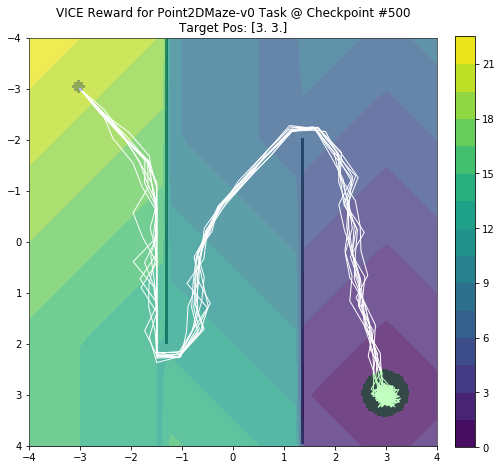

In [15]:
grid_vals, xys = get_grid_vals(train_env, 50)
goal_vals = np.repeat(target_pos[None], n_samples * n_samples, axis=0)

inputs = {
    'state_achieved_goal': grid_vals,
    'state_desired_goal': goal_vals
}

plt.figure(figsize=(8, 8))
from matplotlib.patches import Rectangle

plt.imshow(train_env.render('rgb_array', width=256, height=256),
           extent=(-4, 4, -4, 4), origin='lower', alpha=0.25, zorder=3)

plt.gca().invert_yaxis()
rewards = _maze_distance(train_env, inputs)

plt.contourf(xys[0], xys[1], rewards.reshape(xys[0].shape), levels=20)
plt.colorbar(fraction=0.046, pad=0.04)
plot_trajectories(checkpoint, checkpoint_dir)

if task == 'BoxWall-v1':
    currentAxis = plt.gca()
    currentAxis.add_patch(Rectangle((-2, -2), 4, 4,
                          alpha=1, fill=None, linewidth=4))

plt.scatter(*target_pos, marker='*', s=250, color='white')
plt.title(f'VICE Reward for {domain + task} Task @ Checkpoint #{checkpoint_to_analyze}\n'
          + f'Target Pos: {target_pos}')
plt.show()

## Plot All Checkpoints at Once

In [512]:
def plot_vice_reward(clf, train_env, n_samples=50):
    obs_space = train_env.observation_space['state_observation']
    xs = np.linspace(obs_space.low[0], obs_space.high[0], n_samples)
    ys = np.linspace(obs_space.low[1], obs_space.high[1], n_samples)

    xys = np.meshgrid(xs, ys)
    grid_vals = np.array(xys).transpose(1, 2, 0).reshape((n_samples * n_samples, 2))
    
    rewards = clf.predict(grid_vals)
    plt.gca().invert_yaxis()
    plt.contourf(xys[0], xys[1], rewards.reshape(xys[0].shape), levels=300)
    plt.colorbar(fraction=0.046, pad=0.04)
    target_pos = train_env.unwrapped._get_obs()['state_desired_goal']

    if task == 'BoxWall-v1':
        currentAxis = plt.gca()
        currentAxis.add_patch(Rectangle((-2, -2), 4, 4,
                              alpha=1, fill=None, linewidth=4))

    plt.scatter(*target_pos, marker='*', s=250, color='white')

In [513]:
def plot_grid(imgs, labels=None):
    n_images = len(imgs)
    n_columns = np.sqrt(n_images)
    n_rows = np.ceil(n_images / n_columns) + 1
    plt.figure(figsize=(5 * n_columns, 5 * n_rows))
    for i, img in enumerate(imgs):
        plt.subplot(n_rows, n_columns, i+1)
        plt.axis('off')
        plt.imshow(img)
        if labels is not None:
            plt.title(labels[i], fontsize=20)
    plt.show()

In [514]:
checkpoint_paths = list(glob.iglob(os.path.join(seed_path, 'checkpoint_*')))
# Sort by the checkpoint number at the end
checkpoint_paths = sorted(checkpoint_paths, key=lambda s: int(s.split("_")[-1]))

W0601 00:35:19.244864 140736058082176 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0601 00:35:20.662668 140736058082176 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0601 00:35:21.244581 140736058082176 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0601 00:35:21.915520 140736058082176 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0601 00:35:22.777871 140736058082176 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0601 00:35:23.400812 140736058082176 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.
W0601 00:35:24.263822 140736058082176 hdf5_format.py:171] No training 

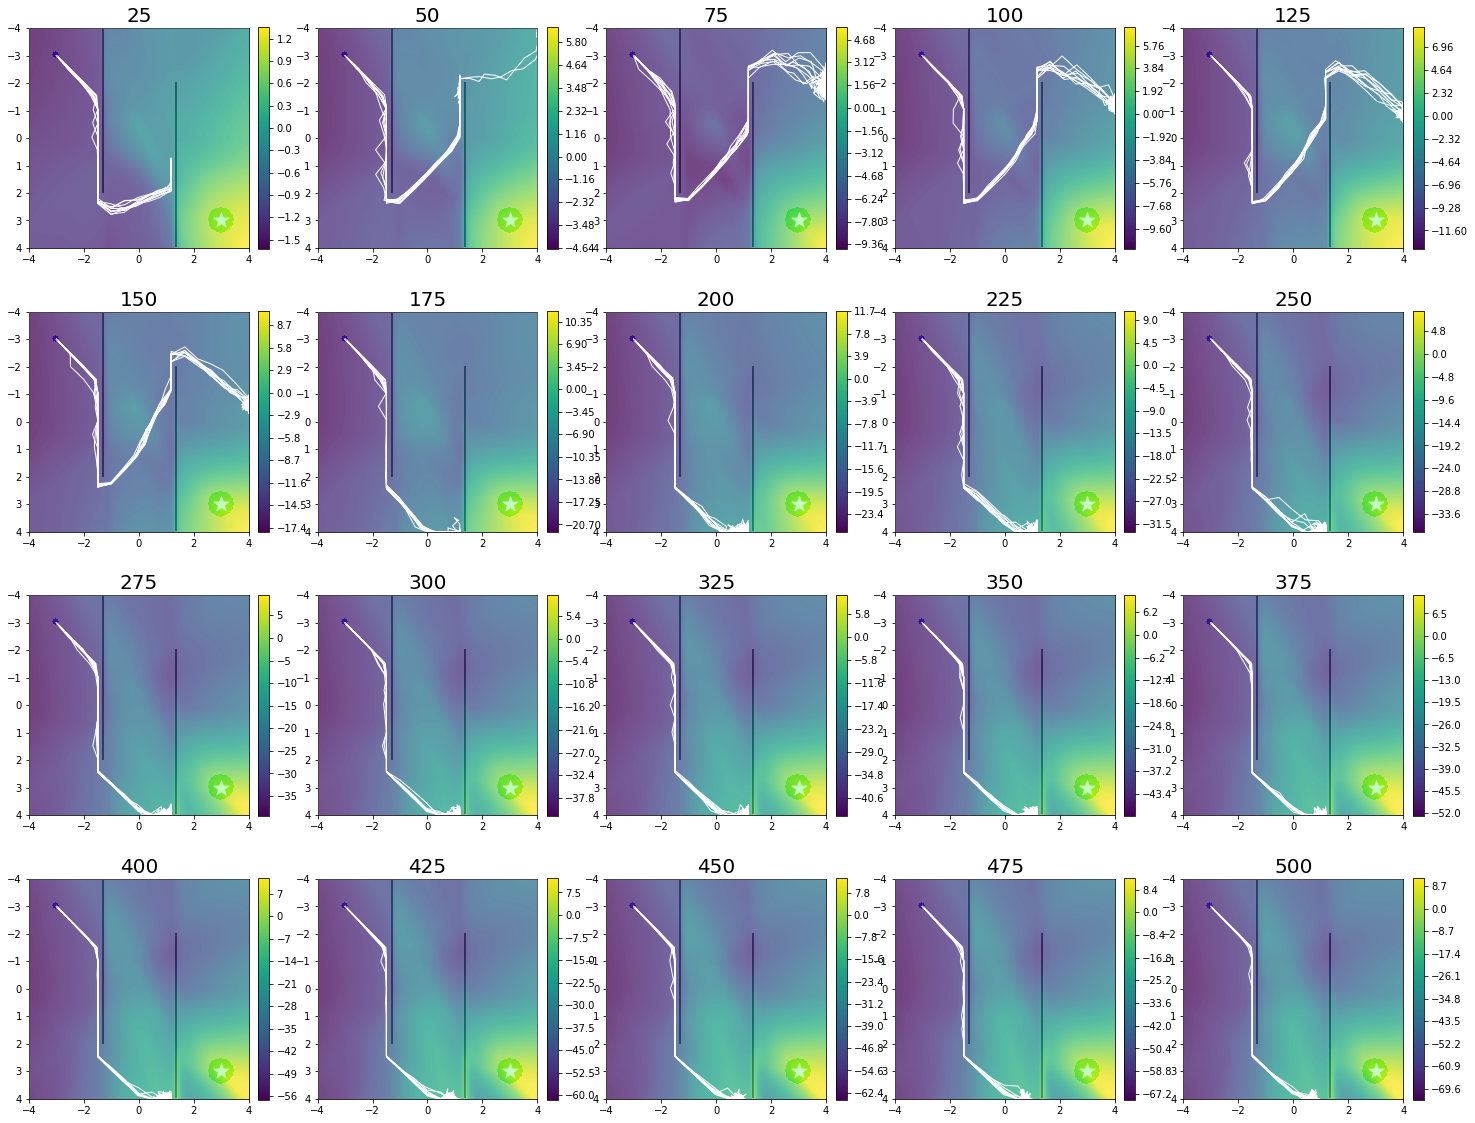

In [515]:
n_plots = len(checkpoint_paths)
n_columns = int(np.sqrt(n_plots) + 1)
n_rows = np.ceil(n_plots / n_columns)
plt.figure(figsize=(5 * n_columns, 5 * n_rows))

for i, path in enumerate(checkpoint_paths):
    with open(os.path.join(path, 'checkpoint.pkl'), 'rb') as f:
        checkpoint = pickle.load(f)
    reward_clf = checkpoint['reward_classifier']
    train_env = checkpoint['training_environment']
    plt.subplot(n_rows, n_columns, i+1, aspect=1)
    plt.imshow(train_env.render('rgb_array', width=256, height=256),
           extent=(-4, 4, -4, 4), origin='lower', alpha=0.25, zorder=3)
    plot_vice_reward(reward_clf, train_env)
    plot_trajectories(checkpoint, path)
    plt.title(int(path.split("_")[-1]), fontsize=20)
    
plt.show()

## Plot Visitations

In [516]:
from softlearning.replay_pools.utils import get_replay_pool_from_variant

replay_pool = None
train_env = None

for i, path in enumerate(checkpoint_paths):
    if replay_pool is None:
        with open(os.path.join(path, 'checkpoint.pkl'), 'rb') as f:
            checkpoint = pickle.load(f)
        variant = checkpoint['variant']
        train_env = checkpoint['training_environment']
        replay_pool = get_replay_pool_from_variant(variant, train_env)
        
    replay_pool_path = os.path.join(path, 'replay_pool.pkl')
    replay_pool.load_experience(replay_pool_path)

W0601 00:35:48.603959 140736058082176 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.


In [517]:
non_zero_rows = replay_pool.data[('observations', 'state_observation')].any(axis=-1)

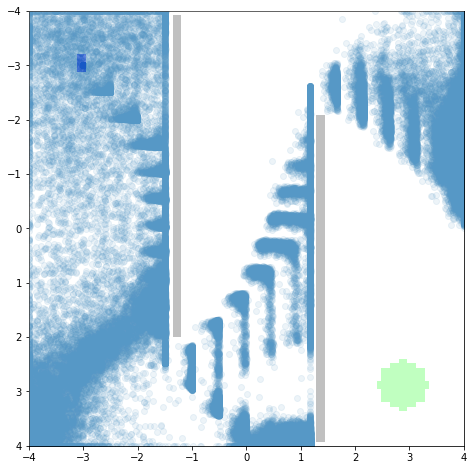

In [518]:
visitations = replay_pool.data[('observations', 'state_observation')][non_zero_rows]
plt.figure(figsize=(8, 8))
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.gca().invert_yaxis()
plt.imshow(train_env.render('rgb_array'),
           extent=(-4, 4, -4, 4),
           origin='lower',
           alpha=0.25,
           zorder=3,
           interpolation='nearest')

plt.scatter(visitations[:, 0], visitations[:, 1], alpha=0.1)

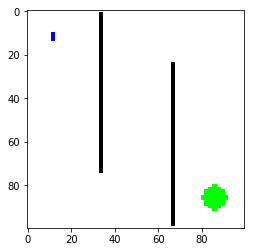

In [519]:
plt.imshow(train_env.render('rgb_array'))

## Plot Goal Examples

In [ ]:
with open('/home/justinvyu/dev/vice/goal_classifier/pointmass_nowalls/bottom_middle/positives.pkl', 'rb') as f:
    data = pickle.load(f)

In [ ]:
plt.figure(figsize=(8, 8))

plt.scatter(data['state_observation'][:,0], data['state_observation'][:,1], s=5)
plt.xlim([-4, 4])
plt.ylim([-4, 4])
plt.gca().invert_yaxis()

## Plot Embedding Distances

In [ ]:
embedding_fn = checkpoint['distance_estimator']
train_env = checkpoint['training_environment']
target_pos = train_env.unwrapped._get_obs()['state_desired_goal']

n_samples = 50
grid_vals = get_grid_vals(train_env, n_samples)
goal_vals = np.repeat(target_pos[None], n_samples * n_samples, axis=0)
dists = np.linalg.norm(embedding_fn.predict(goal_vals) - embedding_fn.predict(grid_vals), axis=-1)

In [ ]:
plt.figure(figsize=(8, 8))
from matplotlib.patches import Rectangle

plt.imshow(train_env.render('rgb_array', width=256, height=256),
           extent=(-4, 4, -4, 4), origin='lower', alpha=0.25, zorder=3)

plt.gca().invert_yaxis()
plt.contourf(xys[0], xys[1], dists.reshape(xys[0].shape), levels=300, zorder=1)
plt.colorbar(fraction=0.046, pad=0.04)

plot_trajectories(checkpoint, path)
    
plt.scatter(*target_pos, marker='*', s=250, color='white', zorder=2)

plt.title(f'|phi(g) - phi(s)| for {domain + task} Task @ Checkpoint #{checkpoint_to_analyze}\n'
          + f'Target Pos: {target_pos}')
plt.show()

## Plot Ground Truth Rewards

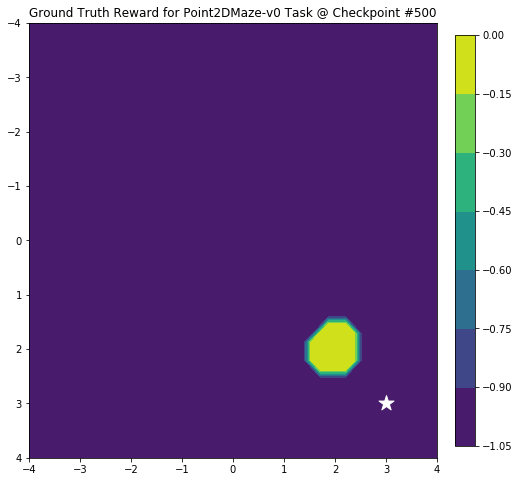

In [287]:
feed_dict = {
    'state_achieved_goal': grid_vals,
    'state_desired_goal': np.full(grid_vals.shape, fill_value=2)
}
train_env.unwrapped.reward_type = 'sparse'
gtr = train_env.unwrapped.compute_rewards(None, feed_dict)
plt.figure(figsize=(8, 8))

from matplotlib.patches import Rectangle

plt.gca().invert_yaxis()

plt.contourf(xys[0], xys[1], gtr.reshape(xys[0].shape))
plt.colorbar(fraction=0.046, pad=0.04)

if task == 'BoxWall-v1':
    currentAxis = plt.gca()
    currentAxis.add_patch(Rectangle((-2, -2), 4, 4,
                          alpha=1, fill=None, linewidth=4))

plt.title(f'Ground Truth Reward for {domain + task} Task @ Checkpoint #{checkpoint_to_analyze}')

plt.scatter(*target_pos, marker='*', s=250, color='white')
plt.show()

## Qs Visualization

In [529]:
checkpoint_to_analyze = 500
checkpoint_dir = os.path.join(seed_path, f'checkpoint_{checkpoint_to_analyze}')

with open(os.path.join(checkpoint_dir, 'checkpoint.pkl'), 'rb') as f:
    checkpoint = pickle.load(f)

W0601 00:36:48.829327 140736058082176 hdf5_format.py:171] No training configuration found in save file: the model was *not* compiled. Compile it manually.


In [530]:
variant = checkpoint['variant']
env = checkpoint['training_environment']
target_pos = env.unwrapped._get_obs()['state_desired_goal']

In [531]:
from softlearning.value_functions.utils import get_Q_function_from_variant

In [532]:
Qs = get_Q_function_from_variant(variant, env)

In [533]:
for i, Q in enumerate(Qs):
    weights_path = os.path.join(checkpoint_dir, f'Qs_{i}')
    Q.load_weights(weights_path)

In [534]:
n_action_samples = 20
sample_actions = np.vstack([env.action_space.sample() for _ in range(n_action_samples)])

In [535]:
n_samples = 50

obs_space = env.observation_space['state_observation']
xs = np.linspace(obs_space.low[0], obs_space.high[0], n_samples)
ys = np.linspace(obs_space.low[1], obs_space.high[1], n_samples)

xys = np.meshgrid(xs, ys)
grid_vals = np.array(xys).transpose(1, 2, 0).reshape((n_samples * n_samples, 2))

In [536]:
value_estimates = []
for pos in grid_vals:
    value_estimates.append(
        np.min([Q.predict([sample_actions,
                        np.repeat(pos, n_action_samples).reshape((n_action_samples, -1))])
             for Q in Qs])
    )

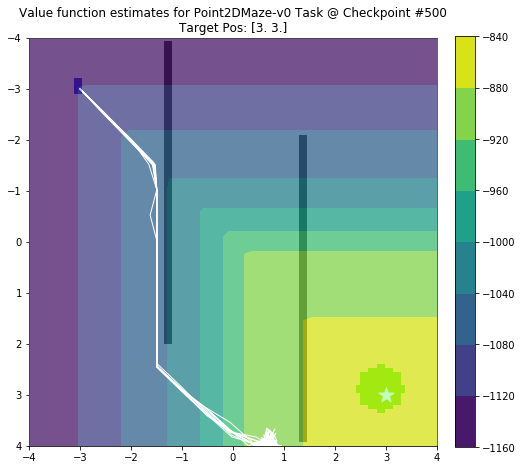

In [537]:
plt.figure(figsize=(8, 8))
from matplotlib.patches import Rectangle
# plt.gca().invert_yaxis()

plt.imshow(train_env.render('rgb_array', width=32, height=32),
           extent=(-4, 4, -4, 4), origin='lower', alpha=0.25, zorder=3)
plt.gca().invert_yaxis()
plt.contourf(xys[0], xys[1], np.array(value_estimates).reshape(xys[0].shape))
plt.colorbar(fraction=0.046, pad=0.04)

plot_trajectories(checkpoint, checkpoint_dir)

if task == 'BoxWall-v1':
    currentAxis = plt.gca()
    currentAxis.add_patch(Rectangle((-2, -2), 4, 4,
                          alpha=1, fill=None, linewidth=4))

plt.scatter(*target_pos, marker='*', s=250, color='white')
plt.title(f'Value function estimates for {domain + task} Task @ Checkpoint #{checkpoint_to_analyze}\n'
          + f'Target Pos: {target_pos}')
plt.show()

In [466]:
np.repeat(grid_vals[0], n_action_samples).reshape((n_action_samples, -1))

array([[-4., -4.],
       [-4., -4.],
       [-4., -4.],
       [-4., -4.],
       [-4., -4.],
       [-4., -4.],
       [-4., -4.],
       [-4., -4.],
       [-4., -4.],
       [-4., -4.],
       [-4., -4.],
       [-4., -4.],
       [-4., -4.],
       [-4., -4.],
       [-4., -4.],
       [-4., -4.],
       [-4., -4.],
       [-4., -4.],
       [-4., -4.],
       [-4., -4.]])